Epoch 1/10
735/735 [==============================] - 219s 297ms/step - loss: 1.4180 - accuracy: 0.5570 - val_loss: 1.2715 - val_accuracy: 0.5742 - lr: 0.0010
Epoch 2/10


/Users/pratiksha/Library/Python/3.9/lib/python/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


735/735 [==============================] - 221s 300ms/step - loss: 1.1921 - accuracy: 0.5905 - val_loss: 1.1606 - val_accuracy: 0.5931 - lr: 0.0010
Epoch 3/10
735/735 [==============================] - 218s 296ms/step - loss: 1.1389 - accuracy: 0.6030 - val_loss: 1.1269 - val_accuracy: 0.6026 - lr: 0.0010
Epoch 4/10
735/735 [==============================] - 218s 296ms/step - loss: 1.1120 - accuracy: 0.6102 - val_loss: 1.1113 - val_accuracy: 0.6073 - lr: 0.0010
Epoch 5/10
735/735 [==============================] - 218s 297ms/step - loss: 1.0944 - accuracy: 0.6151 - val_loss: 1.0848 - val_accuracy: 0.6134 - lr: 0.0010
Epoch 6/10
735/735 [==============================] - 218s 297ms/step - loss: 1.0798 - accuracy: 0.6193 - val_loss: 1.0722 - val_accuracy: 0.6175 - lr: 0.0010
Epoch 7/10
735/735 [==============================] - 220s 299ms/step - loss: 1.0689 - accuracy: 0.6222 - val_loss: 1.0768 - val_accuracy: 0.6147 - lr: 0.0010
Epoch 8/10
735/735 [==============================] - 219

/var/folders/nk/px32ntw90239_n34ks4_61cc0000gn/T/ipykernel_85696/2840016570.py:139: RuntimeWarning: invalid value encountered in divide
  return (out / count).round().astype(np.uint8)
/var/folders/nk/px32ntw90239_n34ks4_61cc0000gn/T/ipykernel_85696/2840016570.py:139: RuntimeWarning: invalid value encountered in cast
  return (out / count).round().astype(np.uint8)



📊 Evaluation Metrics:
Classes (actual): [  0   8  12  14  15  16  17  18  19  20  21  22  23  24  25  26  27  28
  29  30  31  32  33  34  35  36  37  38  39  40  41  42  43  44  45  46
  47  48 100 111 115 116 117 118 119 120 121 122 123 124 125 126 127 128
 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 200 201
 202 203 204 205 206 207 244 250 254]
Classes (predicted): [  0  10  12  13  14  15  17  18  19  20  21  22  23  24  25  26  27  28
  29  30  31  32  33  34  35  36  37  38  39  40  41  42  43  44  45  46
  47  48 100 104 107 108 111 112 113 114 115 116 117 118 119 120 121 122
 123 124 125 126 127 128 129 130 131 132 134 135 136 137 138 139 140 141
 142 143 144 200 201 202 204 205 207 244 250]

Confusion Matrix:
[[1340122       0      24 ...       9       0       0]
 [      0       0       0 ...       0       0       0]
 [      0       0       0 ...       0       0       0]
 ...
 [    514       0       0 ...  399968   92029       0]
 [     60       0       0 

/var/folders/nk/px32ntw90239_n34ks4_61cc0000gn/T/ipykernel_85696/2840016570.py:176: UserWarning: Glyph 127757 (\N{EARTH GLOBE EUROPE-AFRICA}) missing from current font.
  plt.tight_layout()
/var/folders/nk/px32ntw90239_n34ks4_61cc0000gn/T/ipykernel_85696/2840016570.py:176: UserWarning: Glyph 128302 (\N{CRYSTAL BALL}) missing from current font.
  plt.tight_layout()
/var/folders/nk/px32ntw90239_n34ks4_61cc0000gn/T/ipykernel_85696/2840016570.py:176: UserWarning: Glyph 10060 (\N{CROSS MARK}) missing from current font.
  plt.tight_layout()
/Users/pratiksha/Library/Python/3.9/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 127757 (\N{EARTH GLOBE EUROPE-AFRICA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/pratiksha/Library/Python/3.9/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 128302 (\N{CRYSTAL BALL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/pratiksha/Library/Python/

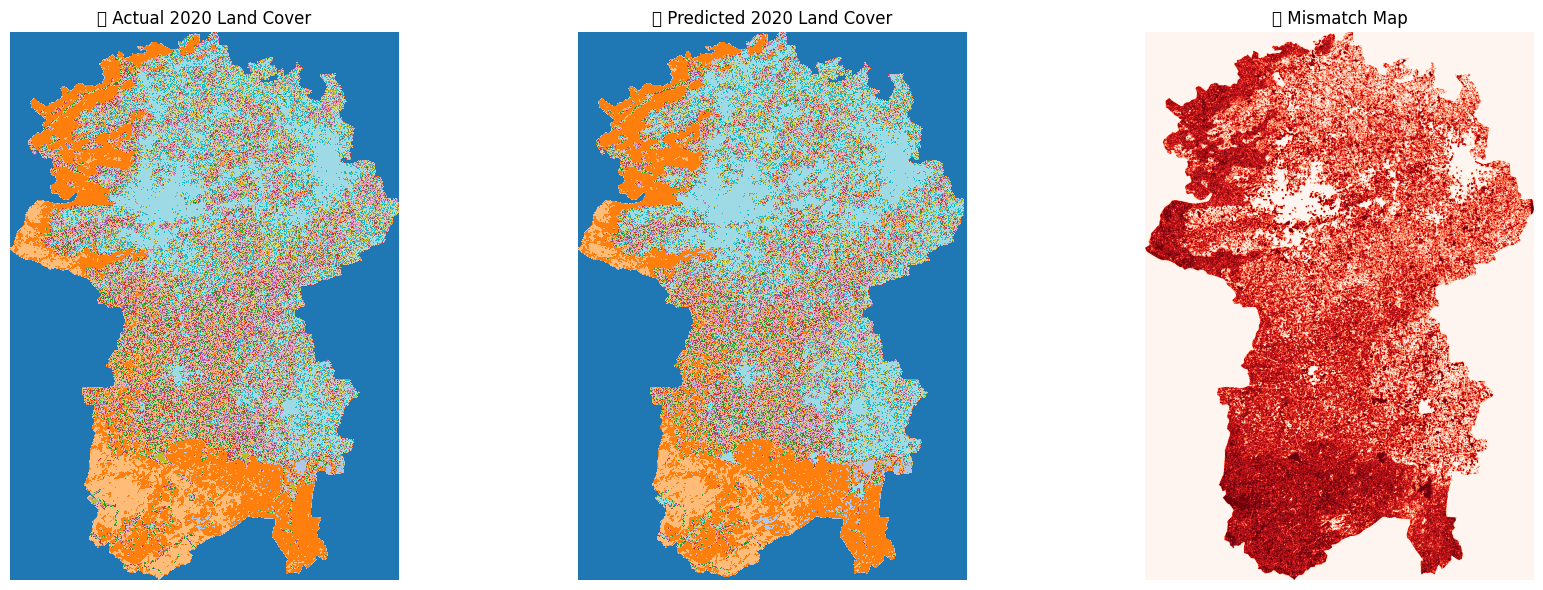

INFO:tensorflow:Assets written to: LandCoverModel_Optimized/assets


INFO:tensorflow:Assets written to: LandCoverModel_Optimized/assets


In [17]:
import tensorflow as tf
from tensorflow.keras import layers, models
import rasterio
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.utils.class_weight import compute_class_weight
import os

# Use mixed precision for speed (works on Apple M1/M2 or modern GPUs)
# Use float32 for CPU compatibility
from tensorflow.keras import mixed_precision
mixed_precision.set_global_policy('float32')


# -----------------------
# Step 1: Load and Prepare Data
# -----------------------
years = [2000, 2005, 2010, 2015]
file_paths = [f'Covai_LandCover_{year}.tif' for year in years]
reference_2020_path = 'Covai_LandCover_2020.tif'

def load_tif(file_path, downsample=2):
    with rasterio.open(file_path) as src:
        arr = src.read(1).astype(np.uint8)
        if downsample > 1:
            arr = arr[::downsample, ::downsample]
    return arr

data_raw = [load_tif(fp, downsample=2) for fp in file_paths]
reference_2020_raw = load_tif(reference_2020_path, downsample=2)

# Unique classes
all_unique = set(np.unique(reference_2020_raw))
for img in data_raw:
    all_unique.update(np.unique(img))

unique_classes = sorted(all_unique)
class_map = {v: i for i, v in enumerate(unique_classes)}
inverse_class_map = {i: v for v, i in class_map.items()}
n_classes = len(unique_classes)

# Remap to 0-indexed classes
data = [np.vectorize(class_map.get)(img) for img in data_raw]
reference_2020 = np.vectorize(class_map.get)(reference_2020_raw)

# -----------------------
# Step 2: Extract Patches
# -----------------------
def extract_patches(image_stack, patch_size=(32, 32), stride=(16, 16)):
    patches = []
    h, w = image_stack[0].shape
    for i in range(0, h - patch_size[0] + 1, stride[0]):
        for j in range(0, w - patch_size[1] + 1, stride[1]):
            stack = [img[i:i+patch_size[0], j:j+patch_size[1]] for img in image_stack]
            patches.append(np.stack(stack, axis=0))
    return np.array(patches)

patch_size = (32, 32)
stride = (16, 16)

X_patches = extract_patches(data, patch_size, stride)
y_patches = extract_patches([reference_2020], patch_size, stride)[:, 0, :, :]
X_patches = np.expand_dims(X_patches, axis=-1)
y_patches_oh = tf.keras.utils.to_categorical(y_patches, num_classes=n_classes)

# -----------------------
# Step 3: Compute Class Weights
# -----------------------
flat_labels = reference_2020.flatten()
unique_present = np.unique(flat_labels)
class_weights = compute_class_weight('balanced', classes=unique_present, y=flat_labels)

class_weights_dict = {i: 1.0 for i in range(n_classes)}
for cls, weight in zip(unique_present, class_weights):
    class_weights_dict[cls] = weight

# -----------------------
# Step 4: Build Light 3D U-Net Model
# -----------------------
def build_model(input_shape, time_steps, n_classes):
    inputs = layers.Input(shape=(time_steps, *input_shape))
    x = layers.Conv3D(16, (3,3,3), padding='same', activation='relu')(inputs)
    x = layers.BatchNormalization()(x)
    x = layers.Conv3D(32, (3,3,3), padding='same', activation='relu')(x)
    x = layers.MaxPooling3D((1,2,2))(x)
    x = layers.Conv3D(64, (3,3,3), padding='same', activation='relu')(x)
    x = layers.Dropout(0.3)(x)
    x = layers.Conv3DTranspose(32, (3,3,3), strides=(1,2,2), padding='same')(x)
    x = layers.Conv3D(n_classes, (1,1,1), activation='softmax', dtype='float32')(x)
    x = layers.Lambda(lambda t: t[:, -1])(x)  # Only final timestep output
    return models.Model(inputs, x)

input_shape = (32, 32, 1)
model = build_model(input_shape, time_steps=4, n_classes=n_classes)

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# -----------------------
# Step 5: Train
# -----------------------
BATCH_SIZE = 16
val_split = 0.1
N = X_patches.shape[0]
val_size = int(N * val_split)
idx = np.arange(N)
np.random.shuffle(idx)

X_train, y_train = X_patches[idx[:-val_size]], y_patches_oh[idx[:-val_size]]
X_val, y_val = X_patches[idx[-val_size:]], y_patches_oh[idx[-val_size:]]

train_ds = tf.data.Dataset.from_tensor_slices((X_train, y_train)).shuffle(1024).cache().batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
val_ds = tf.data.Dataset.from_tensor_slices((X_val, y_val)).cache().batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

callbacks = [
    tf.keras.callbacks.ModelCheckpoint("best_model.h5", save_best_only=True),
    tf.keras.callbacks.ReduceLROnPlateau(patience=2, factor=0.5),
    tf.keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)
]

model.fit(train_ds, validation_data=val_ds, epochs=10, callbacks=callbacks)

# -----------------------
# Step 6: Predict and Reconstruct Full Image
# -----------------------
pred_logits = model.predict(tf.data.Dataset.from_tensor_slices(X_patches).batch(BATCH_SIZE))
pred_classes = np.argmax(pred_logits, axis=-1)

def reconstruct(patches, full_shape, patch_size, stride):
    h, w = full_shape
    out = np.zeros(full_shape)
    count = np.zeros(full_shape)
    idx = 0
    for i in range(0, h - patch_size[0] + 1, stride[0]):
        for j in range(0, w - patch_size[1] + 1, stride[1]):
            out[i:i+patch_size[0], j:j+patch_size[1]] += patches[idx]
            count[i:i+patch_size[0], j:j+patch_size[1]] += 1
            idx += 1
    return (out / count).round().astype(np.uint8)

full_pred_idx = reconstruct(pred_classes, reference_2020.shape, patch_size, stride)
full_pred = np.vectorize(inverse_class_map.get)(full_pred_idx)

# -----------------------
# Step 7: Evaluate and Visualize
# -----------------------
print("\n📊 Evaluation Metrics:")
print("Classes (actual):", np.unique(reference_2020_raw))
print("Classes (predicted):", np.unique(full_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(reference_2020_raw.flatten(), full_pred.flatten()))
print("\nClassification Report:")
print(classification_report(reference_2020_raw.flatten(), full_pred.flatten(), zero_division=0))

# Mismatch map
diff_map = (reference_2020_raw != full_pred).astype(np.uint8)
accuracy = 100 * (1 - diff_map.sum() / diff_map.size)
print(f"\nPixel-wise Accuracy: {accuracy:.2f}%")

# Plot
plt.figure(figsize=(18, 6))
plt.subplot(1, 3, 1)
plt.imshow(reference_2020_raw, cmap='tab20')
plt.title("🌍 Actual 2020 Land Cover")
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(full_pred, cmap='tab20')
plt.title("🔮 Predicted 2020 Land Cover")
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(diff_map, cmap='Reds')
plt.title("❌ Mismatch Map")
plt.axis('off')
plt.tight_layout()
plt.show()

# -----------------------
# Step 8: Save Output
# -----------------------
model.save("LandCoverModel_Optimized")

with rasterio.open(reference_2020_path) as src:
    meta = src.meta
    meta.update(dtype=rasterio.uint8, count=1)

with rasterio.open("Predicted_LandCover_2020_Optimized.tif", 'w', **meta) as dst:
    dst.write(full_pred, 1)


✅ Model Loaded
6528/6528 [==============================] - 77s 12ms/step


/var/folders/nk/px32ntw90239_n34ks4_61cc0000gn/T/ipykernel_85696/3462330044.py:57: RuntimeWarning: invalid value encountered in divide
  return (result / count).round().astype(np.uint8)
/var/folders/nk/px32ntw90239_n34ks4_61cc0000gn/T/ipykernel_85696/3462330044.py:57: RuntimeWarning: invalid value encountered in cast
  return (result / count).round().astype(np.uint8)


6528/6528 [==============================] - 75s 12ms/step


2025-07-12 12:33:39.242385: W tensorflow/core/kernels/data/cache_dataset_ops.cc:858] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


6528/6528 [==============================] - 73s 11ms/step


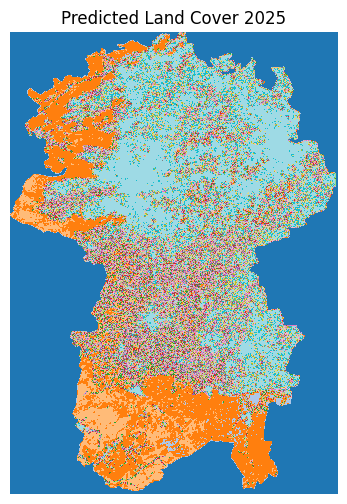

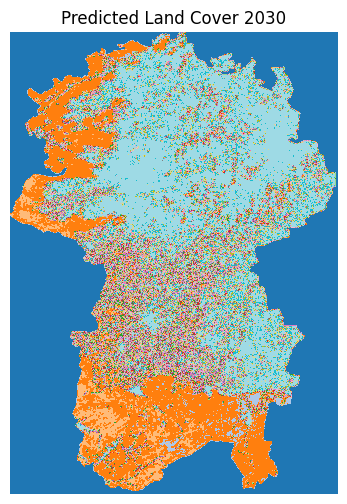

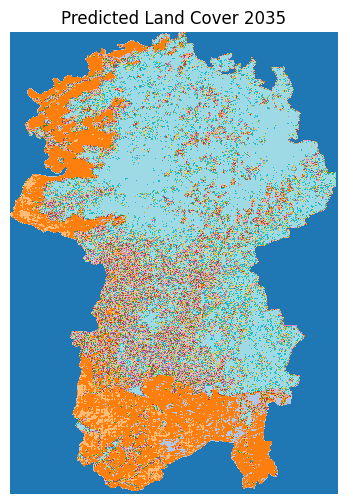

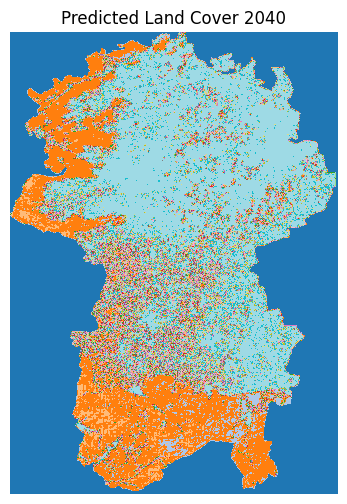

✅ Future land cover predictions saved and visualized.


In [19]:
import numpy as np
import rasterio
import tensorflow as tf
import matplotlib.pyplot as plt
import os

# -----------------------
# Step 1: Load Model & Mappings
# -----------------------
model = tf.keras.models.load_model("LandCoverModel_Optimized")
print("✅ Model Loaded")

# Ensure these match training
# Already defined from training:
# class_map, inverse_class_map, n_classes

# -----------------------
# Step 2: Load Historical Data
# -----------------------
years = [2000, 2005, 2010, 2015, 2020]
file_paths = [f"Covai_LandCover_{year}.tif" for year in years]

def load_tif(path, downsample=2):
    with rasterio.open(path) as src:
        img = src.read(1).astype(np.uint8)
        if downsample > 1:
            img = img[::downsample, ::downsample]
    return img

data_raw = [load_tif(fp) for fp in file_paths]
data = [np.vectorize(class_map.get)(img) for img in data_raw]

# -----------------------
# Step 3: Patch Utilities
# -----------------------
def extract_3d_patches(sequence, patch_size=(32, 32), stride=(16, 16)):
    patches = []
    h, w = sequence[0].shape
    for i in range(0, h - patch_size[0] + 1, stride[0]):
        for j in range(0, w - patch_size[1] + 1, stride[1]):
            cube = [img[i:i+patch_size[0], j:j+patch_size[1]] for img in sequence]
            cube = np.stack(cube, axis=0)
            patches.append(cube)
    patches = np.expand_dims(np.array(patches), axis=-1)  # (N, time, H, W, 1)
    return patches

def reconstruct(patches, shape, patch_size=(32, 32), stride=(16, 16)):
    h, w = shape
    result = np.zeros((h, w))
    count = np.zeros((h, w))
    idx = 0
    for i in range(0, h - patch_size[0] + 1, stride[0]):
        for j in range(0, w - patch_size[1] + 1, stride[1]):
            result[i:i+patch_size[0], j:j+patch_size[1]] += patches[idx]
            count[i:i+patch_size[0], j:j+patch_size[1]] += 1
            idx += 1
    return (result / count).round().astype(np.uint8)

# -----------------------
# Step 4: Predict Next Year
# -----------------------
def predict_next_step(sequence, shape):
    X = extract_3d_patches(sequence)
    preds = model.predict(X, batch_size=2, verbose=1)
    preds = np.argmax(preds, axis=-1)
    return reconstruct(preds, shape)

# -----------------------
# Step 5: Recursive Predictions
# -----------------------
reference_shape = data[0].shape

pred_2025 = predict_next_step(data[1:], reference_shape)
pred_2030 = predict_next_step([data[2], data[3], data[4], pred_2025], reference_shape)
pred_2035 = predict_next_step([data[3], data[4], pred_2025, pred_2030], reference_shape)
pred_2040 = predict_next_step([data[4], pred_2025, pred_2030, pred_2035], reference_shape)

# Convert back to original land cover labels
pred_2025_lc = np.vectorize(inverse_class_map.get)(pred_2025)
pred_2030_lc = np.vectorize(inverse_class_map.get)(pred_2030)
pred_2035_lc = np.vectorize(inverse_class_map.get)(pred_2035)
pred_2040_lc = np.vectorize(inverse_class_map.get)(pred_2040)

# -----------------------
# Step 6: Save TIFF Files
# -----------------------
def save_tif(img, ref_path, out_path):
    with rasterio.open(ref_path) as src:
        meta = src.meta.copy()
        meta.update(dtype=rasterio.uint8, count=1)
    with rasterio.open(out_path, 'w', **meta) as dst:
        dst.write(img.astype(np.uint8), 1)

ref_file = file_paths[-1]  # 2020 for metadata

save_tif(pred_2025_lc, ref_file, "Predicted_LandCover_2025.tif")
save_tif(pred_2030_lc, ref_file, "Predicted_LandCover_2030.tif")
save_tif(pred_2035_lc, ref_file, "Predicted_LandCover_2035.tif")
save_tif(pred_2040_lc, ref_file, "Predicted_LandCover_2040.tif")

# -----------------------
# Step 7: Visualize Results
# -----------------------
def plot_prediction(img, title):
    plt.figure(figsize=(6, 6))
    plt.imshow(img, cmap='tab20')
    plt.title(title)
    plt.axis('off')
    plt.show()

plot_prediction(pred_2025_lc, "Predicted Land Cover 2025")
plot_prediction(pred_2030_lc, "Predicted Land Cover 2030")
plot_prediction(pred_2035_lc, "Predicted Land Cover 2035")
plot_prediction(pred_2040_lc, "Predicted Land Cover 2040")

print("✅ Future land cover predictions saved and visualized.")


In [20]:
import rasterio
import numpy as np

# Check one of your saved predicted rasters
with rasterio.open("Predicted_LandCover_2025.tif") as src:
    pred = src.read(1)
    classes_in_pred = np.unique(pred)

print("✅ Unique class values in prediction:", classes_in_pred)

# Optional: Check if they all exist in the official GLCLU range
expected_classes = set(range(1, 10))  # 1 to 9
unexpected = [c for c in classes_in_pred if c not in expected_classes]

if unexpected:
    print("❌ Unexpected values found in prediction:", unexpected)
else:
    print("🎯 All predicted values are valid GLCLU land cover classes.")


✅ Unique class values in prediction: [  0  10  13  14  15  16  17  18  19  20  21  22  23  24  25  26  27  28
  29  30  31  32  33  34  35  36  37  38  39  40  41  42  43  44  45  46
  47  48 100 104 107 108 111 112 113 114 115 116 117 118 119 120 121 122
 123 124 125 126 127 128 129 130 131 132 134 135 136 137 138 139 140 141
 142 143 144 200 201 202 204 205 207 244 250]
❌ Unexpected values found in prediction: [0, 10, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 100, 104, 107, 108, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 200, 201, 202, 204, 205, 207, 244, 250]


In [21]:
import rasterio
import numpy as np

# Simplified class labels:
# 1: Tree Cover | 2: Shrubland | 3: Grassland | 4: Cropland | 5: Built-up
# 6: Barren | 7: Water | 8: Snow/Ice | 9: Wetland

glclu_to_simplified = {
    0: None, 14: 1, 15: 1, 16: 1, 17: 1, 18: 1, 19: 1, 20: 1, 21: 1,
    104: 4, 107: 4, 108: 4,
    100: 3, 112: 3, 111: 3,
    125: 2, 126: 2, 127: 2, 128: 2, 129: 2, 130: 2, 131: 2, 132: 2,
    200: 5, 201: 5, 202: 5, 204: 5, 205: 5, 207: 5,
    244: 9,
    250: 7,
    113: 6, 114: 6,
    140: 8, 141: 8, 142: 8, 143: 8, 144: 8
}

def remap_to_simplified(input_tif, output_tif, mapping_dict):
    with rasterio.open(input_tif) as src:
        image = src.read(1)
        meta = src.meta.copy()
        simplified = np.vectorize(mapping_dict.get)(image).astype('float32')  # allow NaNs
        simplified = np.nan_to_num(simplified, nan=0).astype(np.uint8)  # fill NaNs as 0
        meta.update(dtype=rasterio.uint8)

        with rasterio.open(output_tif, 'w', **meta) as dst:
            dst.write(simplified, 1)

    print(f"✅ Remapped and saved to {output_tif}")
    return np.unique(simplified)
